# Emotions Classifier

In [1]:
import tensorflow as tf
import os

### Avoid OOM error by setting GPU memory consumption growth

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### Remove Dodgy Images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data'
os.listdir(data_dir)

['happy', '.DS_Store', 'sad', 'neutral', 'angry', 'confuse']

In [5]:
image_exists = ['jpeg', 'png', 'jpg', 'bmp']

In [8]:
for image_class in os.listdir(data_dir):
    if(image_class == '.DS_Store'):
        continue
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exists:
                print("Image is not in text lsit f{}".format(image_path))                
                os.remove(image_path)
        except Exception as e:
            print("Issue with Image f{}".format(image_path))

Image is not in text lsit fdata/happy/.DS_Store
Image is not in text lsit fdata/neutral/penelope_human_head_neutral_au0_square copy.jpg
Image is not in text lsit fdata/neutral/ng-latin-man-with-natural-and-neutral-face-expression-with-beard-and-dark-ha.jpg
Image is not in text lsit fdata/neutral/.DS_Store
Image is not in text lsit fdata/neutral/close-headshot-young-caucasian-man-260nw-1487254088 copy.jpg
Image is not in text lsit fdata/neutral/lightfieldstudios170805421.jpg
Image is not in text lsit fdata/neutral/facestmuli copy.jpg
Image is not in text lsit fdata/neutral/Neutral-scan-teeth-left-two-images-NURBS-model-right-two_W640 copy.jpg
Image is not in text lsit fdata/neutral/studio-closeup-portrait-blond-mature-260nw-1719144025 copy.jpg
Image is not in text lsit fdata/neutral/face-beautiful-young-redhead-girl-260nw-792993208 copy.jpg
Image is not in text lsit fdata/neutral/mature-african-woman-portrait-confident-260nw-2054809925 copy.jpg
Image is not in text lsit fdata/neutral/63

libpng warning: iCCP: known incorrect sRGB profile


## Load Data using Tensorflow Dataset

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import holoviews as hv
from PIL import Image
import seaborn as sns 

In [25]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 750 files belonging to 5 classes.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-12-17 21:53:57.629415: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-17 21:53:57.630650: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [27]:
data_iterator = data.as_numpy_iterator()

In [28]:
batch = data_iterator.next()

2022-12-17 21:56:05.959309: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-17 21:56:06.537168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [29]:
len(batch)

2

Here batch[0] will be images and batch[1] will be label
- 32 are images saved in every batch
- 256 x 256 is size of image
- 3 is color channels (RGB)

In [36]:
batch[0].shape

(32, 256, 256, 3)

In [31]:
batch[1]

array([0, 4, 0, 3, 2, 0, 1, 1, 2, 2, 1, 4, 0, 2, 1, 3, 0, 4, 3, 2, 0, 2,
       3, 0, 3, 0, 3, 4, 3, 2, 4, 2], dtype=int32)

In [34]:
len(batch[1])

32

### labels
- 0 = angry
- 1 = confuse
- 2 = happy
- 3 = neutral
- 4 = sad

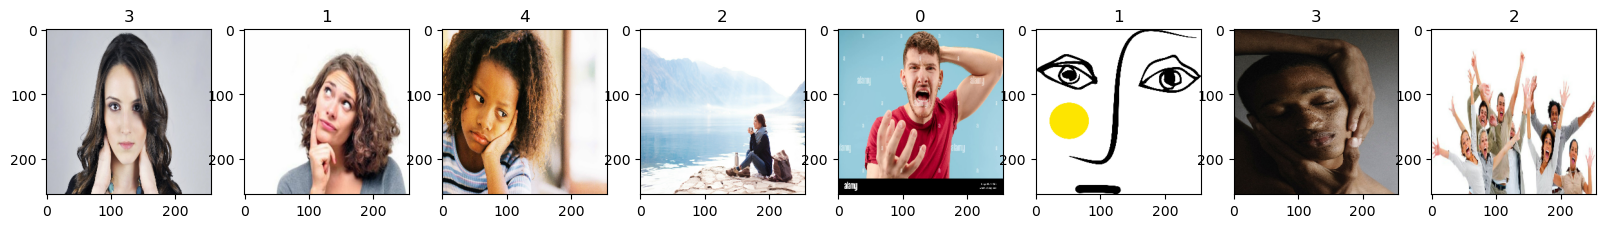

In [66]:
# batch = data_iterator.next()

fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Pre-Processing Data

In [69]:
print(batch[0].min() ,"    ", batch[0].max())

0.0      255.0


- Minimum value = 0 && Maximum value = 1
- Datavalue should be as small as possible to make Neural Netowrk optimize
- Divide every value  with Maximum value (i.e- 255) to get value range(0,1)

In [70]:
scaled = batch[0]/255

## Process Data

In [72]:
data = data.map(lambda x,y: (x/255, y))

In [73]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

2022-12-17 22:27:49.223138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [74]:
batch = scaled_iterator.next()

In [76]:
batch[0].max()

1.0

## Train-Test-Validation Data Split

In [82]:
len(data)

24

In [101]:
train_size = (len(data)*.7)         # 70% of data
val_size = (len(data)*.2)           # 20% of data
test_size = (len(data)*.1)          # 10% of data

In [102]:
train = data.take(int(train_size))
val = data.skip(int(test_size)).take(int(val_size))
test = data.skip(int(test_size + val_size)).take(int(test_size))


## Building Deep Learning Model